In [1]:
from __future__ import print_function
import numpy as np
import sys
sys.path.append('/Users/pawnoutlet/Documents/fdfault/data')
import fdfault
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cff_w_distanc1= np.loadtxt('statistics_stress.out',delimiter=',')
print(cff_w_distanc1.shape)
total_dim_x= 1602
histogram= np.ones((101,80))
distance_array= np.linspace( 5, 0,cff_w_distanc1.shape[0] ) 

(101, 80100)


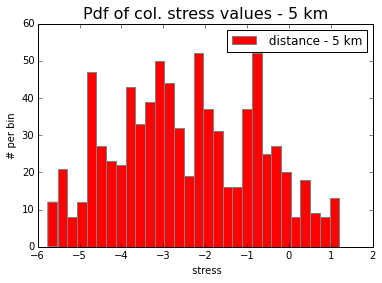

In [3]:
plt.hist(cff_w_distanc1 [0,0:801], bins=30, facecolor='red', edgecolor='gray', label= ' distance - 5 km')
plt.xlabel(' stress')
plt.ylabel('# per bin')
plt.title('Pdf of col. stress values - 5 km', fontsize=16,color='black')
plt.legend( loc='upper right')
#plt.show()

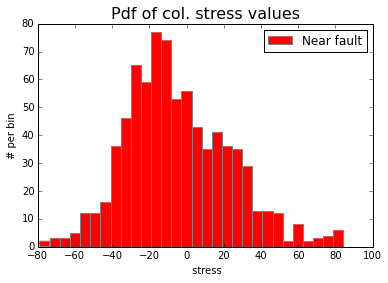

In [4]:
plt.hist(cff_w_distanc1 [95,0:801], bins=30, facecolor='red', edgecolor='gray', label= 'Near fault')
plt.xlabel(' stress')
plt.ylabel('# per bin')
plt.title('Pdf of col. stress values', fontsize=16,color='black')
plt.legend( loc='upper right')
#plt.show()

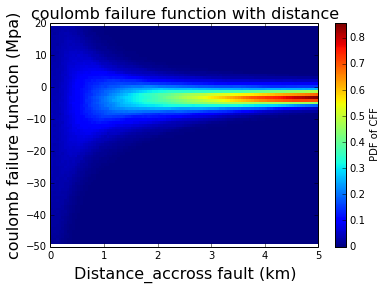

In [5]:
max_stress= 20
#max_stress= cff_w_distanc1.max()
min_stress=-50
#min_stress= cff_w_distanc1.min()
for ii in range(101):
	for jj in range(cff_w_distanc1.shape[1]):
		if cff_w_distanc1[ii,jj] > max_stress:
			cff_w_distanc1[ii,jj] = max_stress
		if cff_w_distanc1[ii,jj] < min_stress:
			cff_w_distanc1[ii,jj] = min_stress

cff_w_distanc1[:,0]= min_stress
cff_w_distanc1[:,cff_w_distanc1.shape[1]-1]= max_stress

#plt.hist(cff_w_distanc1 [0,0:total_dim_x], bins=80)
#plt.show()

for ii in range(101):

 hist, edges = np.histogram(cff_w_distanc1[ii,:], bins=80)
 histogram[ii,:]= hist
# # 	plt.plot(hist)

x,y= np.meshgrid(distance_array, edges[1:len(edges)-1], indexing='ij')
plt.pcolor(x,y, histogram[:,1:cff_w_distanc1.shape[1]-1])
# print( hist.shape, edges.shape)
cbar = plt.colorbar()
#plt.colorbar()
cbar.set_label(' PDF of CFF', rotation=90)
cbar.ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1.0'])
plt.xlabel('Distance_accross fault (km)', fontsize=16, color='black')
plt.ylabel('coulomb failure function (Mpa)', fontsize=16, color='black') 
plt.ylabel('coulomb failure function (Mpa)', fontsize=16, color='black') 
plt.title('coulomb failure function with distance ', fontsize=16, color='black') 
plt.show()


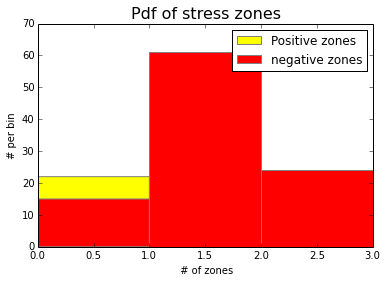

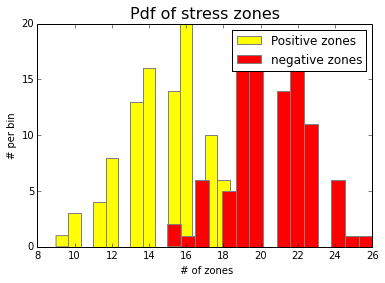

In [6]:
positive_zones= np.loadtxt('positive_zones.out',delimiter=',')
negative_zones= np.loadtxt('negative_zones.out',delimiter=',')
# These zones are 2d arrays. The first array has the 'distance away from fault' and second array has number of realizations
# shape is [91, 100] since it has 100 realizations
plt.hist(positive_zones[0, :], bins= 3, facecolor='yellow', edgecolor='gray', label='Positive zones')
plt.hist(negative_zones[0, :], bins= 3, facecolor='red', edgecolor='gray', label='negative zones')
plt.xlabel(' # of zones')
plt.ylabel('# per bin')
plt.title('Pdf of stress zones', fontsize=16,color='black')
plt.legend( loc='upper right')
plt.show()
plt.hist(positive_zones[90, :], bins= 15, facecolor='yellow', edgecolor='gray', label='Positive zones')
plt.hist(negative_zones[90, :], bins= 15, facecolor='red', edgecolor='gray', label='negative zones')
plt.xlabel(' # of zones')
plt.ylabel('# per bin')
plt.title('Pdf of stress zones', fontsize=16,color='black')
plt.legend( loc='upper right')
plt.show()

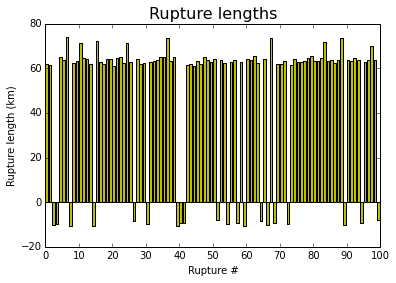

In [7]:
from matplotlib.ticker import MaxNLocator

rupture_leng= np.loadtxt('rupture_length.out',delimiter=',')

#N=2
N= rupture_leng.shape[0]

#width = 0.35 

ind = np.arange(N) 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, rupture_leng, color='y')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Rupture #')
ax.set_ylabel('Rupture length (km)')
ax.set_title('Rupture lengths', fontsize=16,color='black')
plt.show()




(91, 100)


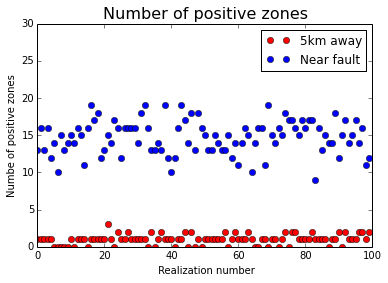

In [8]:
positive_zones= np.loadtxt('positive_zones.out',delimiter=',')
negative_zones= np.loadtxt('negative_zones.out',delimiter=',')

print(positive_zones.shape)
plt.plot (positive_zones[0,:], 'ro', label='5km away' )
plt.xlabel(' Realization number')
plt.ylabel('Numbe of positive zones')
plt.title('Number of positive zones', fontsize=16,color='black')
#plt.show()
plt.plot (positive_zones[90,:], 'bo', label='Near fault')
plt.legend( loc='upper right')
plt.axis([0, 100, 0, 30])
plt.show()


(91, 5001)
(91,)


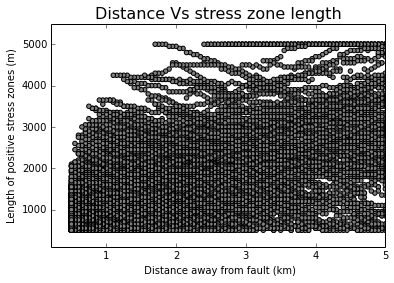

In [14]:
full_pos_zone_len= np.loadtxt('full_postv_zone_len.out',delimiter=',')
print(full_pos_zone_len.shape)

distance_start= 15000
distance_end= 20000  
space_interval=50
#index_y_start= int(distance_start/space_interval)-10    # 10 grid points away from the fault 
index_y_start= int(distance_start/space_interval)
index_y_end= int(distance_end/space_interval)-10
range_of_iter=index_y_end-index_y_start +1
distance_new_array= np.linspace( 5, 0.5, range_of_iter )
print(distance_new_array.shape)


for xe, ye in zip(distance_new_array, full_pos_zone_len):
    
#    plt.scatter([xe] * len(ye), ye, c= ye , cmap='viridis')
    plt.scatter([xe] * len(ye), ye, facecolor='0.5')
plt.axis([0.2, 5, 100, 5500])
plt.xlabel(' Distance away from fault (km)')
plt.ylabel('Length of positive stress zones (m)')
plt.title('Distance Vs stress zone length', fontsize=16,color='black')

plt.show()

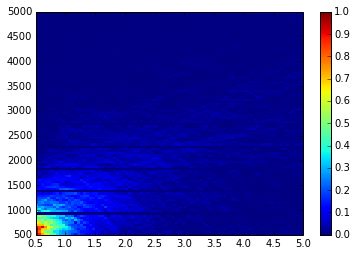

In [21]:
histogram_pos= np.zeros((91,100))
for ii in range(90):
    hist_pos, edges_pos =np.histogram(full_pos_zone_len[ii,:], bins=100, range=[500, 5000] )
#    print(hist_pos.shape)
#    print(edges_pos.shape)
    histogram_pos[ii,:]= hist_pos
#print(edges_pos)
x_pos,y_pos= np.meshgrid(distance_new_array, edges_pos, indexing='ij')
plt.pcolor(x_pos,y_pos, histogram_pos/histogram_pos.max()) 
plt.colorbar()
plt.show()

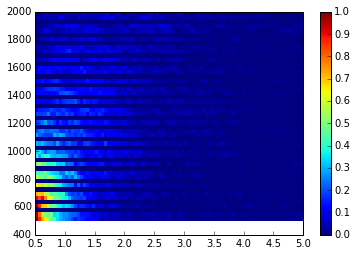

In [30]:
histogram_pos_1= np.zeros((91,50))
for ii in range(90):
    hist_pos, edges_pos =np.histogram(full_pos_zone_len[ii,:], bins=50, range=[500, 2000] )
#    print(hist_pos.shape)
#    print(edges_pos.shape)
    histogram_pos_1[ii,:]= hist_pos
#print(edges_pos)
x_pos,y_pos= np.meshgrid(distance_new_array, edges_pos, indexing='ij')
plt.pcolor(x_pos,y_pos, histogram_pos_1/histogram_pos_1.max()) 
plt.colorbar()
plt.show()

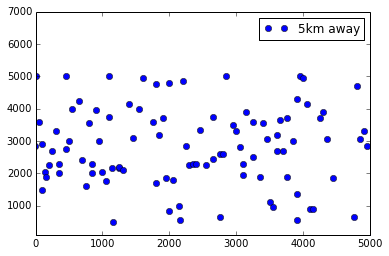

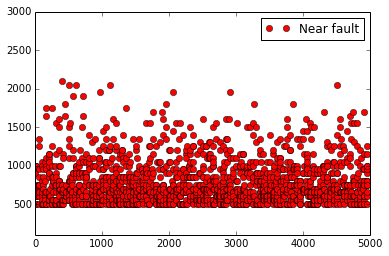

In [31]:
plt.plot( full_pos_zone_len[0, :], 'bo', label='5km away')
plt.axis([1, 5000, 100, 7000])
plt.legend( loc='upper right')
plt.show()
plt.plot( full_pos_zone_len[90, :], 'ro', label='Near fault')
plt.axis([1, 5000, 100, 3000])
plt.legend( loc='upper right')
plt.show()